In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
url="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv"

In [ ]:
dataset= pd.read_csv(url)

In [ ]:
dataset


,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [ ]:
dataset.head()

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
dataset.columns = ['name', 'year', 'price', 'kms_driven', 'fuel_type']
cars_df = dataset.dropna()
cars_df['price'] = cars_df['price'].replace({'Ask For Price': None, ',': ''}, regex=True).astype(float)
cars_df['kms_driven'] = cars_df['kms_driven'].replace({' kms': '', ',': ''}, regex=True).astype(float)
cars_df.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_6416\646543041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['price'] = cars_df['price'].replace({'Ask For Price': None, ',': ''}, regex=True).astype(float)
C:\Users\rober\AppData\Local\Temp\ipykernel_6416\646543041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['kms_driven'] = cars_df['kms_driven'].replace({' kms': '', ',': ''}, regex=True).astype(float)


,name,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,2006,425000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,NaN,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000.0,Diesel


In [ ]:
cars_df['price'] = cars_df['price'].replace({'Ask For Price': None})

cars_df['price'] = cars_df['price'].replace({'[₹, ]': ''}, regex=True).astype(float)

cars_df['kms_driven'] = cars_df['kms_driven'].replace({'[ kms]': ''}, regex=True).replace({'[,]': ''}, regex=True).astype(float)

cleaned_cars_df = cars_df.dropna()

cleaned_cars_df.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_6416\2530867329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['price'] = cars_df['price'].replace({'Ask For Price': None})
C:\Users\rober\AppData\Local\Temp\ipykernel_6416\2530867329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['price'] = cars_df['price'].replace({'[₹, ]': ''}, regex=True).astype(float)
C:\Users\rober\AppData\Local\Temp\ipykernel_6416\2530867329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,name,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000.0,Diesel
6,Ford Figo,2012,175000.0,41000.0,Diesel


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        837 non-null    object 
 1   year        837 non-null    object 
 2   price       816 non-null    float64
 3   kms_driven  837 non-null    float64
 4   fuel_type   837 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [ ]:
unique_kms_values = cars_df['kms_driven'].unique()

unique_kms_values

array([4.50000e+04, 4.00000e+01, 2.20000e+04, 2.80000e+04, 3.60000e+04,
       5.90000e+04, 4.10000e+04, 2.50000e+04, 2.45300e+04, 6.00000e+04,
       3.00000e+04, 3.20000e+04, 4.86600e+04, 4.00000e+03, 1.69340e+04,
       4.30000e+04, 3.55500e+04, 3.95220e+04, 3.90000e+04, 5.50000e+04,
       7.20000e+04, 1.59750e+04, 7.00000e+04, 2.34520e+04, 3.55220e+04,
       4.85080e+04, 1.54870e+04, 8.20000e+04, 2.00000e+04, 6.80000e+04,
       3.80000e+04, 2.70000e+04, 3.30000e+04, 4.60000e+04, 1.60000e+04,
       4.70000e+04, 3.50000e+04, 3.08740e+04, 1.50000e+04, 2.96850e+04,
       1.30000e+05, 1.90000e+04, 5.40000e+04, 1.30000e+04, 3.82000e+04,
       5.00000e+04, 1.35000e+04, 3.60000e+03, 4.58630e+04, 6.05000e+04,
       1.25000e+04, 1.80000e+04, 1.33490e+04, 2.90000e+04, 4.40000e+04,
       4.20000e+04, 1.40000e+04, 4.90000e+04, 3.62000e+04, 5.10000e+04,
       1.04000e+05, 3.33330e+04, 3.36000e+04, 5.60000e+03, 7.50000e+03,
       2.43300e+04, 6.54800e+04, 2.80280e+04, 2.00000e+05, 9.900

In [ ]:
cars_df['kms_driven'] = cars_df['kms_driven'].replace({' kms': '', ' km': '', '[,]': ''}, regex=True).astype(float)


cars_df['price'] = cars_df['price'].replace({'[₹, ]': ''}, regex=True).astype(float)


cleaned_cars_df = cars_df.dropna()


cleaned_cars_df.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_6416\2586689114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['kms_driven'] = cars_df['kms_driven'].replace({' kms': '', ' km': '', '[,]': ''}, regex=True).astype(float)
C:\Users\rober\AppData\Local\Temp\ipykernel_6416\2586689114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['price'] = cars_df['price'].replace({'[₹, ]': ''}, regex=True).astype(float)


,name,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000.0,Diesel
6,Ford Figo,2012,175000.0,41000.0,Diesel


In [ ]:
unique_kms_values = cars_df['kms_driven'].unique()

unique_kms_values

array([4.50000e+04, 4.00000e+01, 2.20000e+04, 2.80000e+04, 3.60000e+04,
       5.90000e+04, 4.10000e+04, 2.50000e+04, 2.45300e+04, 6.00000e+04,
       3.00000e+04, 3.20000e+04, 4.86600e+04, 4.00000e+03, 1.69340e+04,
       4.30000e+04, 3.55500e+04, 3.95220e+04, 3.90000e+04, 5.50000e+04,
       7.20000e+04, 1.59750e+04, 7.00000e+04, 2.34520e+04, 3.55220e+04,
       4.85080e+04, 1.54870e+04, 8.20000e+04, 2.00000e+04, 6.80000e+04,
       3.80000e+04, 2.70000e+04, 3.30000e+04, 4.60000e+04, 1.60000e+04,
       4.70000e+04, 3.50000e+04, 3.08740e+04, 1.50000e+04, 2.96850e+04,
       1.30000e+05, 1.90000e+04, 5.40000e+04, 1.30000e+04, 3.82000e+04,
       5.00000e+04, 1.35000e+04, 3.60000e+03, 4.58630e+04, 6.05000e+04,
       1.25000e+04, 1.80000e+04, 1.33490e+04, 2.90000e+04, 4.40000e+04,
       4.20000e+04, 1.40000e+04, 4.90000e+04, 3.62000e+04, 5.10000e+04,
       1.04000e+05, 3.33330e+04, 3.36000e+04, 5.60000e+03, 7.50000e+03,
       2.43300e+04, 6.54800e+04, 2.80280e+04, 2.00000e+05, 9.900

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X = cars_df[['kms_driven']]
Y = cars_df['price']
model = LinearRegression()
model.fit(X, Y)
predictions = model.predict(X)
plt.scatter(X, Y, color='blue', label='Actual Prices')
plt.plot(X, predictions, color='red', label='Predicted Prices')
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Kms Driven')
plt.legend()
plt.show()

ValueError: Input y contains NaN.

In [ ]:
missing_values = cars_df.isnull().sum()

missing_values

name          0
year          0
price         0
kms_driven    0
fuel_type     0
dtype: int64

In [ ]:
cars_df_cleaned = cars_df.dropna(subset=['kms_driven', 'price'])

cleaned_shape = cars_df_cleaned.shape

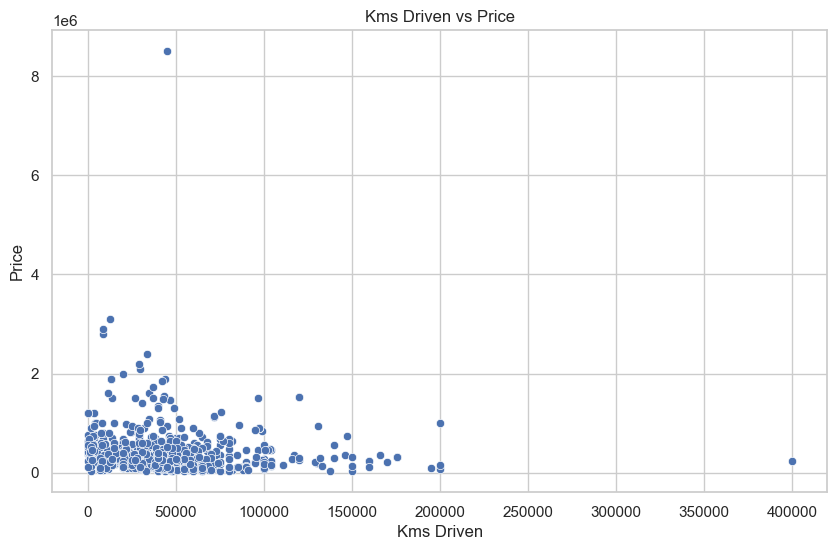

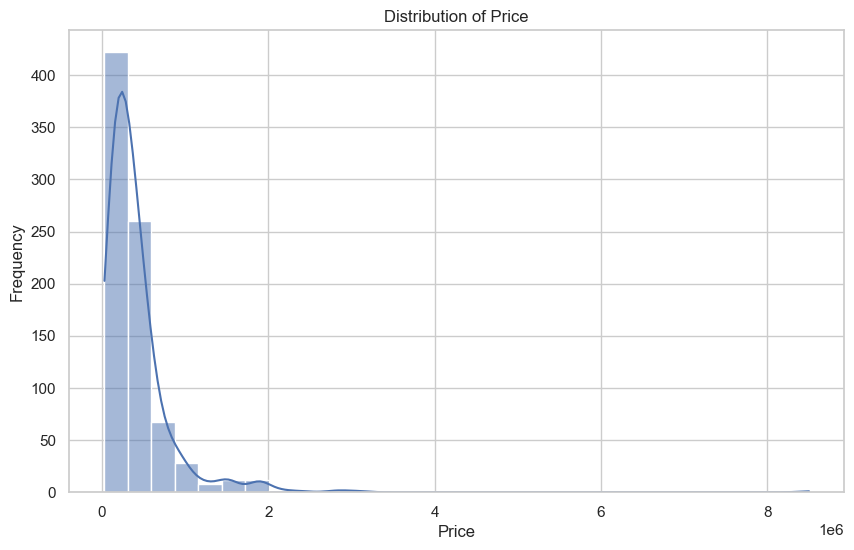

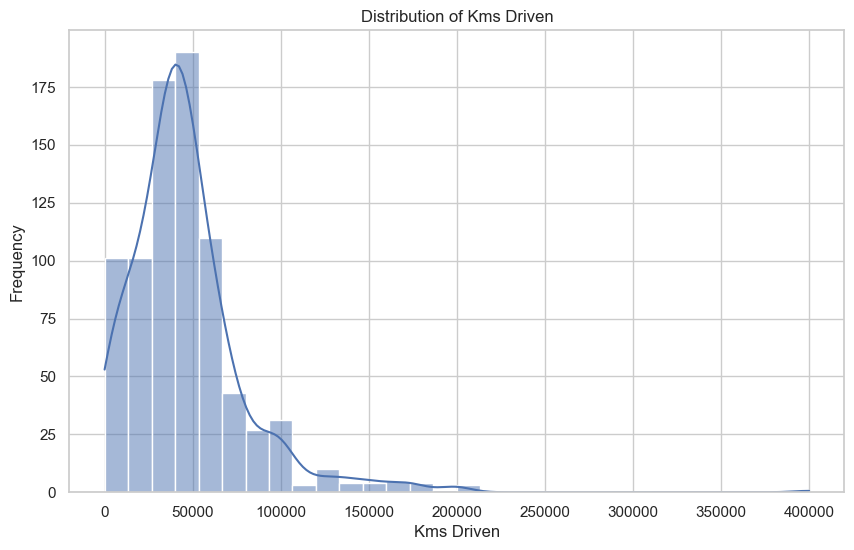

In [ ]:
import seaborn as sns


sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_df_cleaned, x='kms_driven', y='price')
plt.title('Kms Driven vs Price')
plt.xlabel('Kms Driven')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cars_df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cars_df_cleaned['kms_driven'], bins=30, kde=True)
plt.title('Distribution of Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Price')

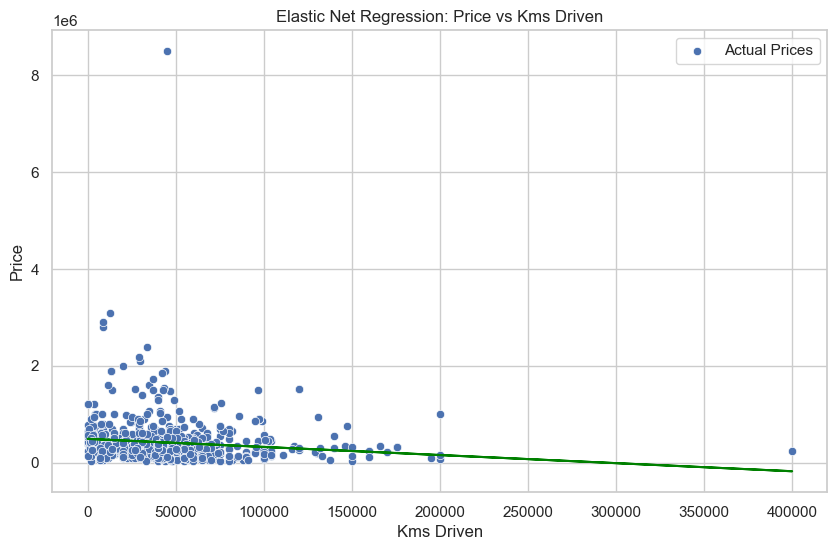

In [ ]:
from sklearn.linear_model import ElasticNet


X_cleaned = cars_df_cleaned[['kms_driven']]
Y_cleaned = cars_df_cleaned['price']

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)


elastic_net_model.fit(X_cleaned, Y_cleaned)


elastic_net_predictions = elastic_net_model.predict(X_cleaned)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_df_cleaned, x='kms_driven', y='price', label='Actual Prices')
plt.plot(X_cleaned, elastic_net_predictions, color='green', label='Elastic Net Predictions')
plt.title('Elastic Net Regression: Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Price')

In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(Y_cleaned, elastic_net_predictions)

r2

0.014605800801927415

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(elastic_net_model, X_cleaned, Y_cleaned, cv=5, scoring='r2')

mean_r2_score = cv_scores.mean()
cv_scores, mean_r2_score

(array([-0.03155261,  0.01268968, -0.04121201,  0.00157858,  0.00118087]),
 -0.01146309763071256)

In [ ]:
cv_scores

array([-0.03155261,  0.01268968, -0.04121201,  0.00157858,  0.00118087])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier